# 第8章: 中心性指標

## 学習目標
- 中心性の概念を理解する
- 各種中心性指標を計算できる
- 適切な中心性指標を選択できる
- 中心性を使った分析ができる

## 難易度: 中級〜上級

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.sans-serif'] = ['IPAexGothic'] + plt.rcParams['font.sans-serif']
import numpy as np
import pandas as pd
%matplotlib inline

---
## 8.1 中心性とは

**中心性（Centrality）** は、ネットワーク内でノードがどれだけ「重要」かを測る指標です。

| 中心性 | 概念 | 用途例 |
|--------|------|--------|
| 次数中心性 | 接続数が多い | 人気度 |
| 近接中心性 | 他ノードに近い | アクセス性 |
| 媒介中心性 | 多くの経路上にある | ブローカー |
| 固有ベクトル中心性 | 重要なノードと接続 | 影響力 |
| PageRank | 重要なノードから参照 | Web検索 |

In [2]:
# サンプルグラフ
G = nx.karate_club_graph()
print(f"空手クラブグラフ: {G.number_of_nodes()}ノード, {G.number_of_edges()}エッジ")

空手クラブグラフ: 34ノード, 78エッジ


---
## 8.2 次数中心性（Degree Centrality）

ノードの次数を正規化した値。接続数が多いほど高い。

$$C_D(v) = \frac{deg(v)}{n-1}$$

In [3]:
# 次数中心性
degree_centrality = nx.degree_centrality(G)

# 上位10ノード
print("=== 次数中心性 TOP10 ===")
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_degree:
    print(f"  ノード {node}: {centrality:.4f} (次数: {G.degree(node)})")

=== 次数中心性 TOP10 ===
  ノード 33: 0.5152 (次数: 17)
  ノード 0: 0.4848 (次数: 16)
  ノード 32: 0.3636 (次数: 12)
  ノード 2: 0.3030 (次数: 10)
  ノード 1: 0.2727 (次数: 9)
  ノード 3: 0.1818 (次数: 6)
  ノード 31: 0.1818 (次数: 6)
  ノード 8: 0.1515 (次数: 5)
  ノード 13: 0.1515 (次数: 5)
  ノード 23: 0.1515 (次数: 5)


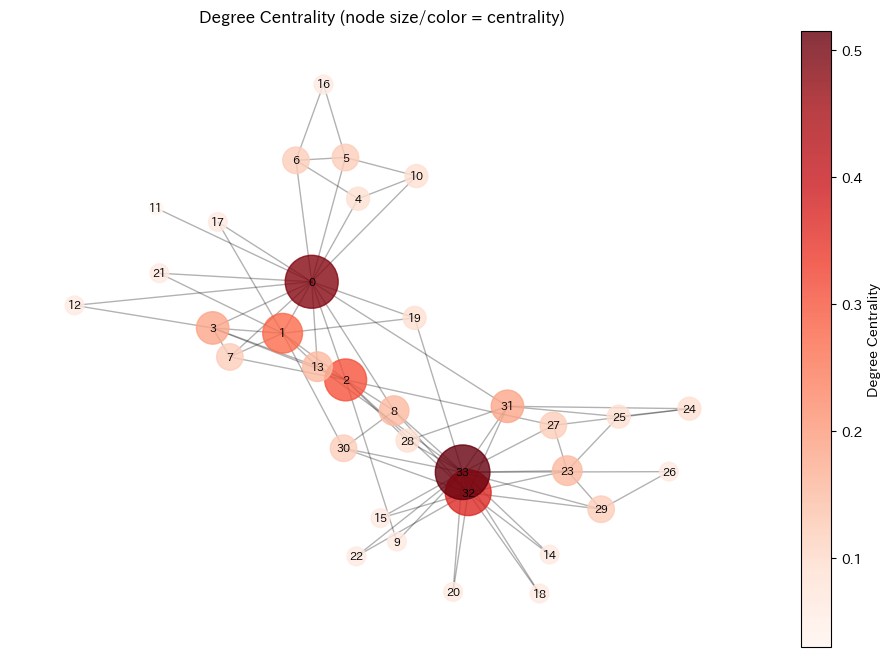

In [4]:
# 可視化
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# ノードサイズを中心性に比例
node_sizes = [degree_centrality[n] * 3000 for n in G.nodes()]
node_colors = list(degree_centrality.values())

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
        node_color=node_colors, cmap=plt.cm.Reds, alpha=0.8, ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

ax.set_title("Degree Centrality (node size/color = centrality)")
plt.colorbar(nodes, ax=ax, label='Degree Centrality')
ax.axis('off')
plt.show()

---
## 8.3 近接中心性（Closeness Centrality）

他のノードへの最短距離の平均の逆数。中心にいるほど高い。

$$C_C(v) = \frac{n-1}{\sum_{u \neq v} d(v, u)}$$

In [5]:
# 近接中心性
closeness_centrality = nx.closeness_centrality(G)

print("=== 近接中心性 TOP10 ===")
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_closeness:
    print(f"  ノード {node}: {centrality:.4f}")

=== 近接中心性 TOP10 ===
  ノード 0: 0.5690
  ノード 2: 0.5593
  ノード 33: 0.5500
  ノード 31: 0.5410
  ノード 8: 0.5156
  ノード 13: 0.5156
  ノード 32: 0.5156
  ノード 19: 0.5000
  ノード 1: 0.4853
  ノード 3: 0.4648


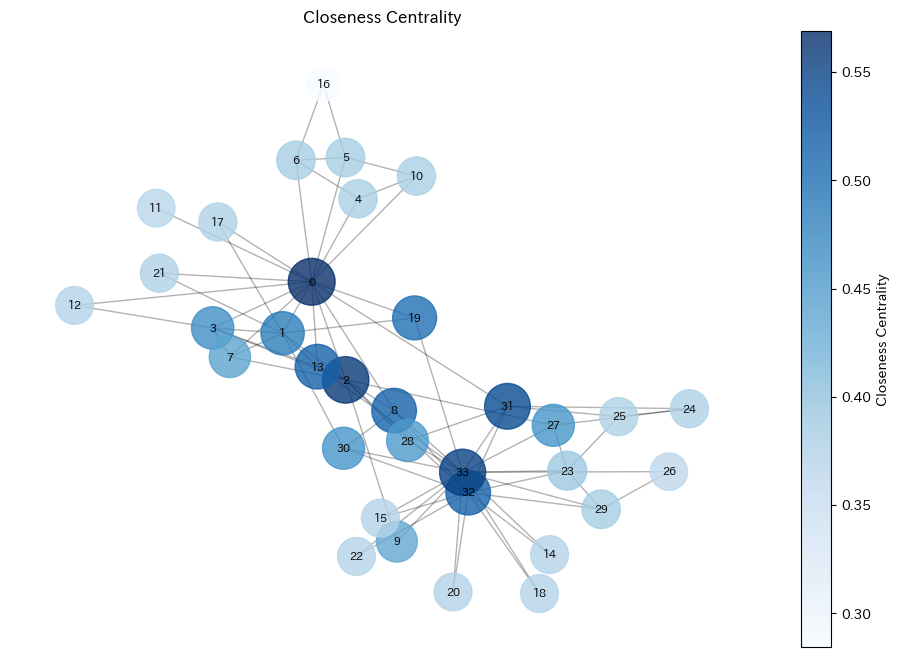

In [6]:
# 可視化
fig, ax = plt.subplots(figsize=(12, 8))
node_sizes = [closeness_centrality[n] * 2000 for n in G.nodes()]
node_colors = list(closeness_centrality.values())

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
        node_color=node_colors, cmap=plt.cm.Blues, alpha=0.8, ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

ax.set_title("Closeness Centrality")
plt.colorbar(nodes, ax=ax, label='Closeness Centrality')
ax.axis('off')
plt.show()

---
## 8.4 媒介中心性（Betweenness Centrality）

そのノードを通る最短経路の割合。ブローカー的な位置にいるほど高い。

$$C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$$

In [7]:
# 媒介中心性
betweenness_centrality = nx.betweenness_centrality(G)

print("=== 媒介中心性 TOP10 ===")
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_betweenness:
    print(f"  ノード {node}: {centrality:.4f}")

=== 媒介中心性 TOP10 ===
  ノード 0: 0.4376
  ノード 33: 0.3041
  ノード 32: 0.1452
  ノード 2: 0.1437
  ノード 31: 0.1383
  ノード 8: 0.0559
  ノード 1: 0.0539
  ノード 13: 0.0459
  ノード 19: 0.0325
  ノード 5: 0.0300


In [8]:
# エッジの媒介中心性
edge_betweenness = nx.edge_betweenness_centrality(G)

print("\n=== エッジ媒介中心性 TOP5 ===")
top_edge_betweenness = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
for edge, centrality in top_edge_betweenness:
    print(f"  エッジ {edge}: {centrality:.4f}")


=== エッジ媒介中心性 TOP5 ===
  エッジ (0, 31): 0.1273
  エッジ (0, 6): 0.0781
  エッジ (0, 5): 0.0781
  エッジ (0, 2): 0.0778
  エッジ (0, 8): 0.0742


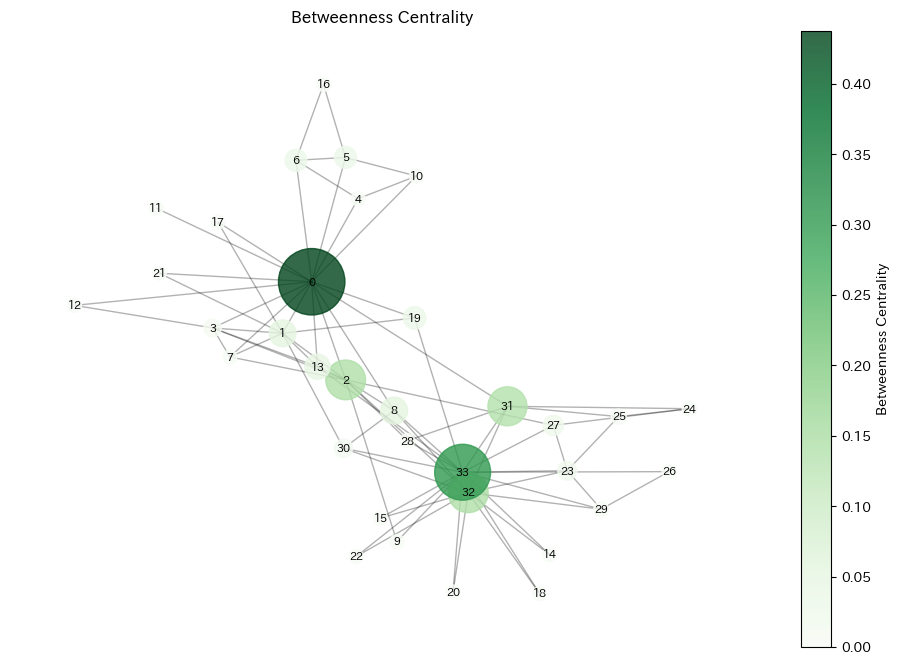

In [9]:
# 可視化
fig, ax = plt.subplots(figsize=(12, 8))
node_sizes = [betweenness_centrality[n] * 5000 + 100 for n in G.nodes()]
node_colors = list(betweenness_centrality.values())

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
        node_color=node_colors, cmap=plt.cm.Greens, alpha=0.8, ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

ax.set_title("Betweenness Centrality")
plt.colorbar(nodes, ax=ax, label='Betweenness Centrality')
ax.axis('off')
plt.show()

---
## 8.5 固有ベクトル中心性（Eigenvector Centrality）

重要なノードに接続しているほど高い。

In [10]:
# 固有ベクトル中心性
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

print("=== 固有ベクトル中心性 TOP10 ===")
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_eigenvector:
    print(f"  ノード {node}: {centrality:.4f}")

=== 固有ベクトル中心性 TOP10 ===
  ノード 33: 0.3734
  ノード 0: 0.3555
  ノード 2: 0.3172
  ノード 32: 0.3087
  ノード 1: 0.2660
  ノード 8: 0.2274
  ノード 13: 0.2265
  ノード 3: 0.2112
  ノード 31: 0.1910
  ノード 30: 0.1748


---
## 8.6 PageRank

Googleが開発したWebページのランキングアルゴリズム。

In [11]:
# PageRank
pagerank = nx.pagerank(G, alpha=0.85)

print("=== PageRank TOP10 ===")
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_pagerank:
    print(f"  ノード {node}: {score:.4f}")

=== PageRank TOP10 ===
  ノード 33: 0.0970
  ノード 0: 0.0885
  ノード 32: 0.0759
  ノード 2: 0.0628
  ノード 1: 0.0574
  ノード 31: 0.0420
  ノード 23: 0.0411
  ノード 3: 0.0372
  ノード 5: 0.0338
  ノード 13: 0.0335


---
## 8.7 中心性の比較

In [12]:
# 全中心性をDataFrameにまとめる
centralities = pd.DataFrame({
    'Degree': degree_centrality,
    'Closeness': closeness_centrality,
    'Betweenness': betweenness_centrality,
    'Eigenvector': eigenvector_centrality,
    'PageRank': pagerank
})

# 各指標でのランキング
rankings = centralities.rank(ascending=False)

print("=== 各中心性指標でのTOP5 ===")
for col in centralities.columns:
    top5 = centralities[col].nlargest(5).index.tolist()
    print(f"{col}: {top5}")

=== 各中心性指標でのTOP5 ===
Degree: [33, 0, 32, 2, 1]
Closeness: [0, 2, 33, 31, 8]
Betweenness: [0, 33, 32, 2, 31]
Eigenvector: [33, 0, 2, 32, 1]
PageRank: [33, 0, 32, 2, 1]


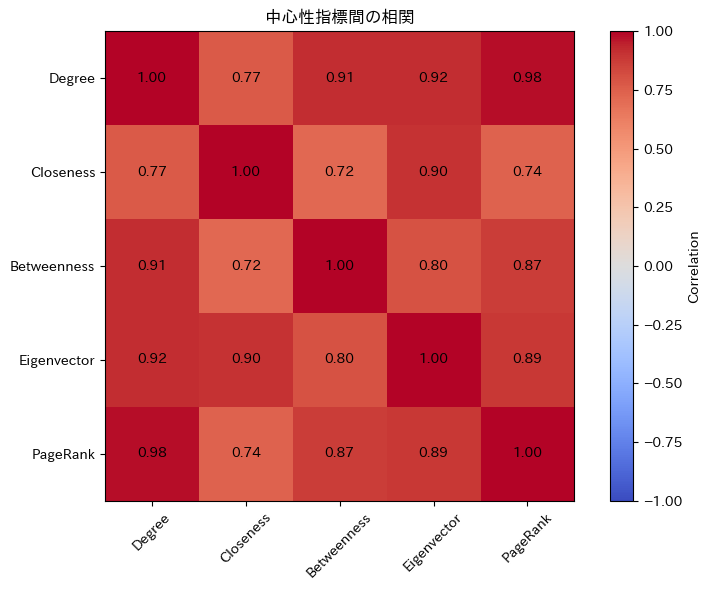

In [13]:
# 相関分析
correlation = centralities.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)

# 値を表示
for i in range(len(correlation)):
    for j in range(len(correlation)):
        plt.text(j, i, f'{correlation.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=10)

plt.title('中心性指標間の相関')
plt.tight_layout()
plt.show()

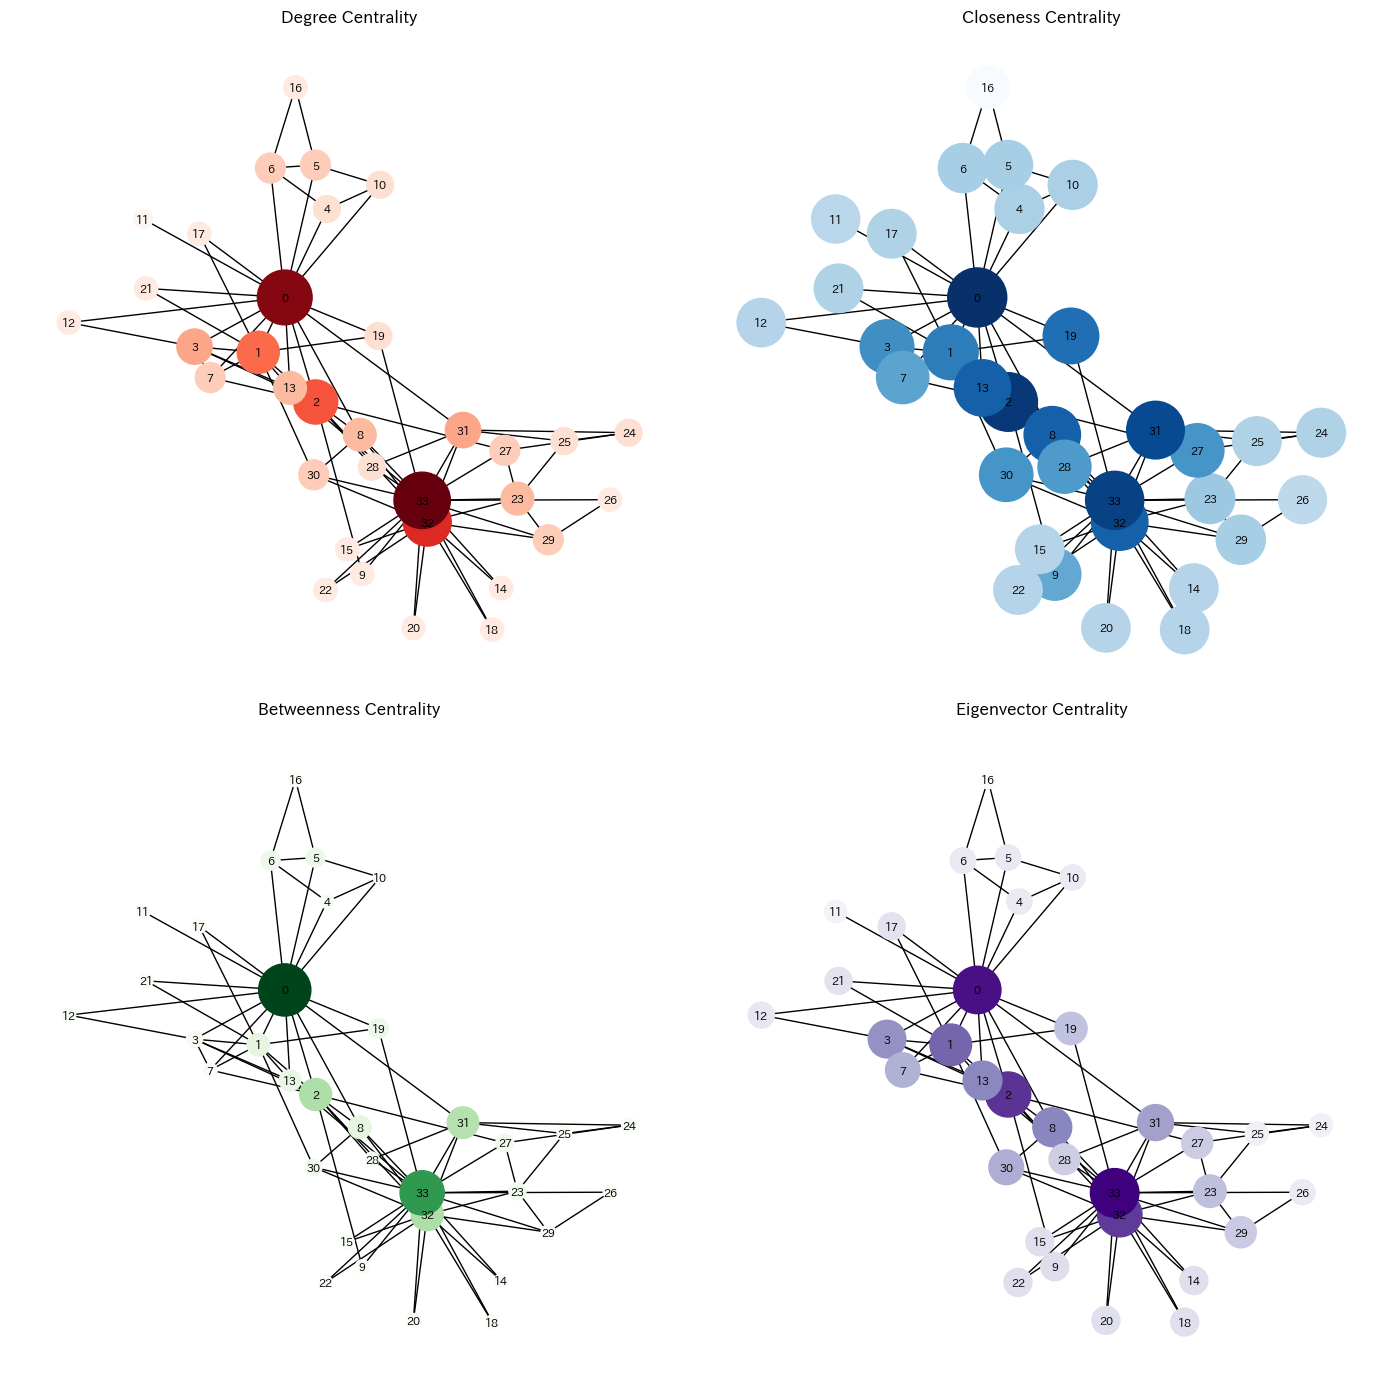

In [14]:
# 4つの中心性を並べて可視化
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

centrality_data = [
    (degree_centrality, 'Degree', plt.cm.Reds),
    (closeness_centrality, 'Closeness', plt.cm.Blues),
    (betweenness_centrality, 'Betweenness', plt.cm.Greens),
    (eigenvector_centrality, 'Eigenvector', plt.cm.Purples)
]

for ax, (cent, name, cmap) in zip(axes.flatten(), centrality_data):
    node_sizes = [cent[n] * 3000 + 100 for n in G.nodes()]
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=node_sizes,
            node_color=list(cent.values()), cmap=cmap, font_size=8)
    ax.set_title(f'{name} Centrality')

plt.tight_layout()
plt.show()

---
## 例題: インフルエンサー分析

In [15]:
# 複合スコアでインフルエンサーを特定
def identify_influencers(G, top_n=5):
    """複数の中心性指標を組み合わせてインフルエンサーを特定"""
    
    # 各中心性を計算
    degree = nx.degree_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
    
    # 正規化して複合スコアを計算
    scores = {}
    for node in G.nodes():
        # 各指標を0-1に正規化して平均
        d = degree[node] / max(degree.values())
        b = betweenness[node] / max(betweenness.values()) if max(betweenness.values()) > 0 else 0
        e = eigenvector[node] / max(eigenvector.values())
        scores[node] = (d + b + e) / 3
    
    return sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]

# インフルエンサー特定
influencers = identify_influencers(G, top_n=5)

print("=== インフルエンサー（複合スコア） ===")
for node, score in influencers:
    print(f"  ノード {node}: スコア {score:.4f}")

=== インフルエンサー（複合スコア） ===
  ノード 0: スコア 0.9644
  ノード 33: スコア 0.8983
  ノード 32: スコア 0.6215
  ノード 2: スコア 0.5887
  ノード 1: スコア 0.4550


---
## 練習問題

### 練習問題1: 有向グラフの中心性

以下の有向グラフで、入次数中心性と出次数中心性を計算し、「情報の受け手」と「情報の発信者」を特定してください。

```python
DG = nx.DiGraph()
DG.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'C'), ('C', 'D'), ('D', 'E'),
    ('E', 'A'), ('E', 'B'), ('E', 'C')
])
```

In [16]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
DG = nx.DiGraph()
DG.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'C'), ('C', 'D'), ('D', 'E'),
    ('E', 'A'), ('E', 'B'), ('E', 'C')
])

# 入次数中心性（情報の受け手）
in_degree_cent = nx.in_degree_centrality(DG)
print("=== 入次数中心性（情報の受け手） ===")
for node, cent in sorted(in_degree_cent.items(), key=lambda x: x[1], reverse=True):
    print(f"  {node}: {cent:.4f} (入次数: {DG.in_degree(node)})")

# 出次数中心性（情報の発信者）
out_degree_cent = nx.out_degree_centrality(DG)
print("\n=== 出次数中心性（情報の発信者） ===")
for node, cent in sorted(out_degree_cent.items(), key=lambda x: x[1], reverse=True):
    print(f"  {node}: {cent:.4f} (出次数: {DG.out_degree(node)})")

# 最大の受け手と発信者
top_receiver = max(in_degree_cent, key=in_degree_cent.get)
top_sender = max(out_degree_cent, key=out_degree_cent.get)
print(f"\n最大の情報受け手: {top_receiver}")
print(f"最大の情報発信者: {top_sender}")

# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(DG, seed=42)
nx.draw(DG, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=14, arrows=True, arrowsize=20)
plt.title("有向グラフ")
plt.show()
```
</details>

### 練習問題2: 重要なエッジの発見

空手クラブグラフで、エッジ媒介中心性を使って「コミュニティ間の橋渡し」となっているエッジを見つけてください。

In [17]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
G = nx.karate_club_graph()

# エッジ媒介中心性
edge_betweenness = nx.edge_betweenness_centrality(G)

# TOP10エッジ
print("=== エッジ媒介中心性 TOP10 ===")
top_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
for edge, cent in top_edges:
    # 両端のクラブを確認
    club_u = G.nodes[edge[0]]['club']
    club_v = G.nodes[edge[1]]['club']
    bridge = "橋" if club_u != club_v else ""
    print(f"  {edge}: {cent:.4f} ({club_u} - {club_v}) {bridge}")

# コミュニティ間のエッジを抽出
bridge_edges = [(u, v) for u, v in G.edges() 
                if G.nodes[u]['club'] != G.nodes[v]['club']]
print(f"\nコミュニティ間エッジ数: {len(bridge_edges)}")

# 可視化
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)

# クラブで色分け
colors = ['lightblue' if G.nodes[n]['club'] == 'Mr. Hi' else 'lightcoral' for n in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=colors, node_size=500, font_size=8)

# 橋となるエッジを強調
top5_edges = [e[0] for e in top_edges[:5]]
nx.draw_networkx_edges(G, pos, edgelist=top5_edges, edge_color='red', width=3)

plt.title("空手クラブグラフ\n（赤線＝媒介中心性TOP5エッジ）")
plt.show()
```
</details>

---
## 8.8 章のまとめ

この章では以下を学びました：

1. **次数中心性**: 接続数による重要度
2. **近接中心性**: ネットワーク中心への近さ
3. **媒介中心性**: ブローカーとしての重要度
4. **固有ベクトル中心性**: 影響力のあるノードとの接続
5. **PageRank**: Web検索ランキング

### 次章の予告
次章では、クラスタリングとコミュニティ検出について学びます。